In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.duplicated().sum()

723

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(302, 14)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['sex'].value_counts()

,count
sex,
1,206
0,96


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x = df.drop(columns=['target'])
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,)

In [ ]:
x_train.shape

(211, 13)

In [ ]:
y_train.shape

(211,)

In [ ]:
y_train

,target
199,0
189,0
260,1
73,0
81,0
...,...
47,0
321,1
300,1
67,0


In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model = Sequential()
model.add(Dense(32, activation="relu", input_dim = 13))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train_scaled, y_train, batch_size = 302, epochs=50, validation_split=0.2 )

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5655 - loss: 0.6892 - val_accuracy: 0.4651 - val_loss: 0.7813
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5655 - loss: 0.6818 - val_accuracy: 0.4651 - val_loss: 0.7738
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5655 - loss: 0.6747 - val_accuracy: 0.4651 - val_loss: 0.7667
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5655 - loss: 0.6679 - val_accuracy: 0.4651 - val_loss: 0.7599
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5655 - loss: 0.6613 - val_accuracy: 0.4651 - val_loss: 0.7532
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5655 - loss: 0.6551 - val_accuracy: 0.4651 - val_loss: 0.7466
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5655 - loss: 0.6493 - val_accuracy: 0.4651 - val_loss: 0.7401
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5655 - loss: 0.6438 - val_accuracy: 0.4651 - val_loss: 0.7342
E

Text(0, 0.5, 'loss')

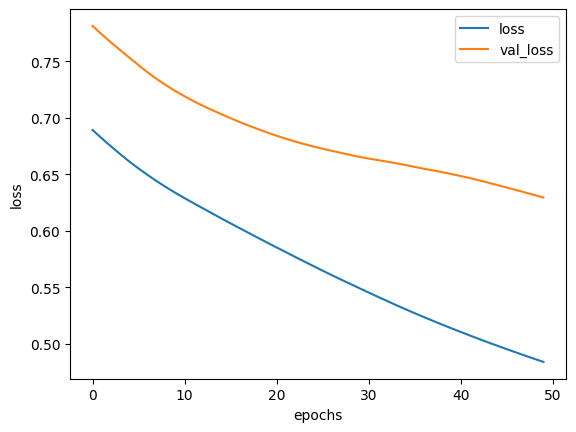

In [ ]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")

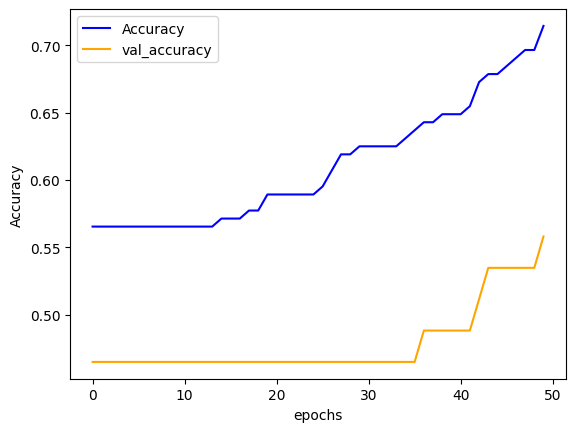

In [ ]:
plt.plot(history.history["accuracy"], label= "Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label = "val_accuracy", color="orange")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
y_pred = model.predict(x_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


In [ ]:
y_pred

array([[0.6088094 ],
       [0.65233225],
       [0.7398542 ],
       [0.506117  ],
       [0.6523727 ],
       [0.89678514],
       [0.9748077 ],
       [0.5076276 ],
       [0.75408816],
       [0.6219427 ],
       [0.5408677 ],
       [0.48310167],
       [0.4792563 ],
       [0.6811944 ],
       [0.6954609 ],
       [0.5533641 ],
       [0.5927737 ],
       [0.50568014],
       [0.8422791 ],
       [0.48081994],
       [0.6039096 ],
       [0.56556785],
       [0.72552824],
       [0.48882177],
       [0.6374914 ],
       [0.8849985 ],
       [0.82665604],
       [0.6076491 ],
       [0.8133274 ],
       [0.65527374],
       [0.70516145],
       [0.5629817 ],
       [0.47678798],
       [0.56498826],
       [0.8914989 ],
       [0.94930536],
       [0.52354866],
       [0.9513817 ],
       [0.62030566],
       [0.48004973],
       [0.77800494],
       [0.7182898 ],
       [0.7880383 ],
       [0.53110427],
       [0.48390973],
       [0.67058146],
       [0.8300124 ],
       [0.687

In [ ]:
y_prediction = np.where(1, y_pred >= 0.5, 0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_prediction)

0.6703296703296703

In [ ]:
# Using Schostic gradient descent instead of batch gradient descent

In [ ]:
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=13))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs = 50, batch_size=1, validation_split=0.2)

Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 7.5127e-04 - val_accuracy: 1.0000 - val_loss: 6.7503e-04
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 8.4536e-04 - val_accuracy: 1.0000 - val_loss: 8.0793e-04
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 4.7464e-04 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 5.3435e-04 - val_accuracy: 1.0000 - val_loss: 9.3942e-04
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 3.0272e-04 - val_accuracy: 1.0000 - val_loss: 9.8802e-04
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 3.3706e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 3.1908e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accura

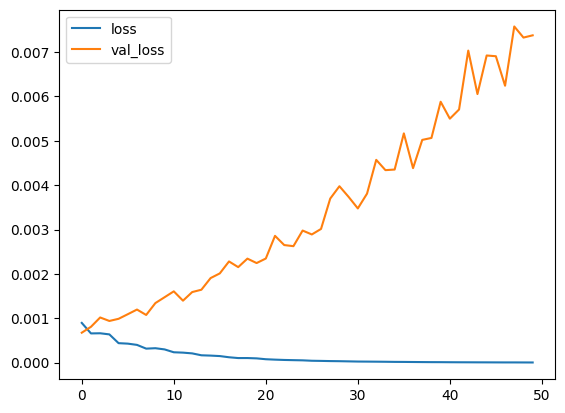

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

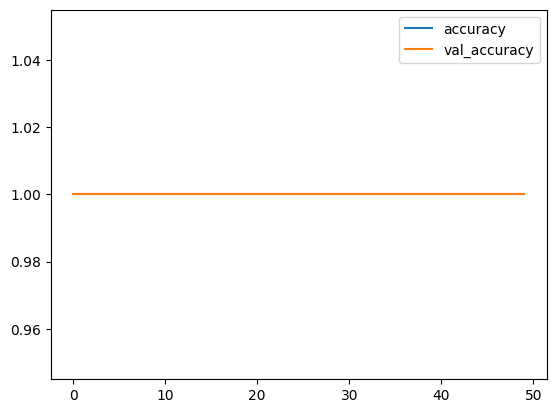

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [ ]:
y_pred = model.predict(x_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step


In [ ]:
y_prediction = np.where(1, y_pred >= 0.5, 0)

In [ ]:
accuracy_score(y_test, y_prediction)

0.7582417582417582

In [ ]:
y_test = np.ravel(y_test)
y_prediction = np.ravel(y_prediction)

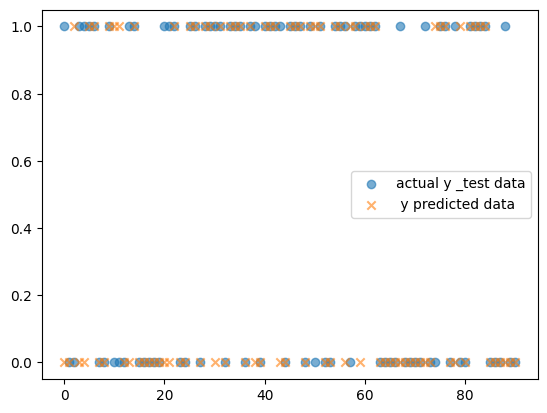

In [ ]:
plt.scatter(range(len(y_test)), y_test, label = "actual y _test data", alpha = 0.6)
plt.scatter(range(len(y_prediction)), y_prediction, label = " y predicted data", marker = "x", alpha= 0.6)
plt.legend()

In [ ]:
# Now using mini batch gradient descent

In [ ]:
model = Sequential()
model.add(Dense(32, activation="relu", input_dim = 13))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="Adam", loss = "binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train_scaled, y_train, batch_size=24, validation_split=0.2, epochs=50)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.6041 - loss: 0.7069 - val_accuracy: 0.4651 - val_loss: 0.7178
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5487 - loss: 0.6963 - val_accuracy: 0.4651 - val_loss: 0.6998
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5454 - loss: 0.6776 - val_accuracy: 0.4651 - val_loss: 0.6891
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5135 - loss: 0.6794 - val_accuracy: 0.4651 - val_loss: 0.6832
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6104 - loss: 0.6350 - val_accuracy: 0.4651 - val_loss: 0.6788
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6164 - loss: 0.6165 - val_accuracy: 0.4651 - val_loss: 0.6742
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5431 - loss: 0.6329 - val_accuracy: 0.4651 - val_loss: 0.6678
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5384 - loss: 0.6076 - val_accuracy: 0.4651 - val_loss: 0.6611

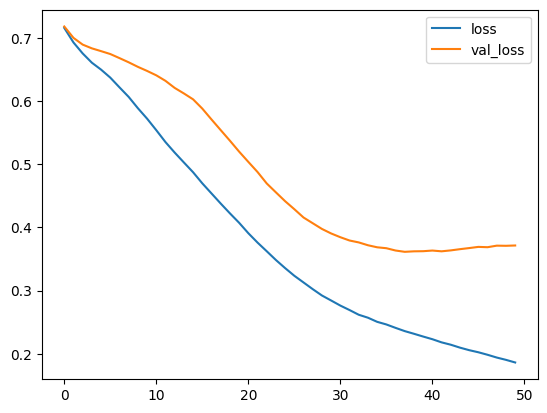

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

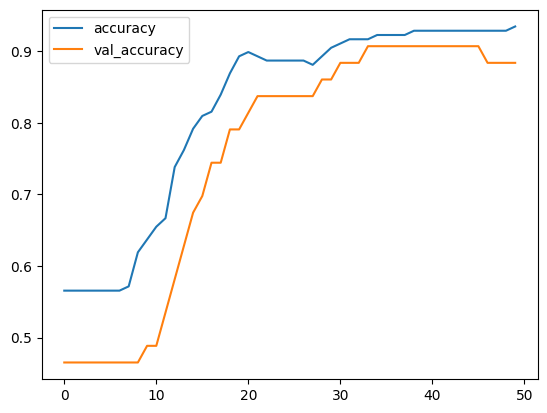

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [ ]:
y_pred = model.predict(x_test_scaled)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


In [ ]:
y_prediction = np.where(1, y_pred >= 0.5, 0)

In [ ]:
accuracy_score(y_test, y_prediction)

0.7582417582417582